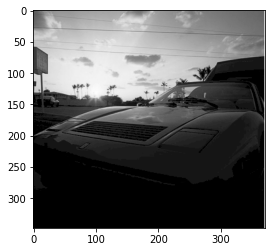

(348, 371)
Number of pixels in image:  129108


In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Reading image

img = cv2.imread('input_2.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

#Get the number of pixels

x, y = img.shape
print(img.shape)

pix = x * y
print('Number of pixels in image: ', pix)

In [19]:
#Transform image into array

arr_img = img.flatten()
print(arr_img)

[103  93  90 ...   5   5 255]


In [20]:
#Sort the array

sorted_arr = np.sort(arr_img)
print(sorted_arr)

[  0   0   0 ... 255 255 255]


In [21]:
#Defining Saturation

s = 0.3
s1 = s / 2
s2 = s1

In [22]:
#Get the position of the quantiles

pos_v_min = int(pix * s1 / 100)
pos_v_max = int((pix * (1 - (s2 / 100))) - 1)

print(pos_v_min)
print(pos_v_max)

193
128913


In [23]:
#Get the values of (quantiles)

v_min = sorted_arr[pos_v_min]
v_max = sorted_arr[pos_v_max]

print(v_min)
print(v_max)

0
255


In [24]:
#Replace the values that are greater than v_max with v_max, and those which are smaller than v_min with v_min

idx_min = arr_img < v_min
idx_max = arr_img > v_max

arr_img[idx_min] = v_min
arr_img[idx_max] = v_max

In [25]:
#Normalization
#f(x) = (x - Vmin) × (max - min) / (Vmax - Vmin) + min.

for i in range (1, pix):
    arr_img[i] = ((arr_img[i] - v_min) * (255-0)) / ((v_max - v_min) + 0)

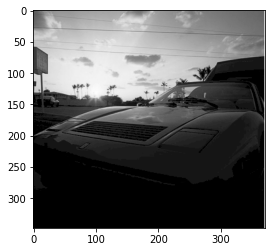

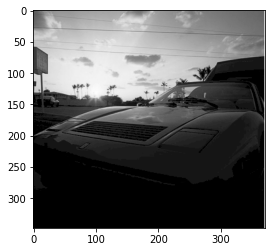

In [26]:
#Reshape the result into a matrix

resultant = np.reshape(arr_img, img.shape)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(resultant, cmap = 'gray')
plt.show()